In [1]:
import warnings
warnings.filterwarnings('ignore')

path = "../../kaggle/data/"

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Pour afficher des caréctéritiques des datasets
def inspect_columns(df):    
    total_rows = len(df)
    result = pd.DataFrame({
        'total_rows': [total_rows] * df.shape[1],
        'missing_values': df.isnull().sum(),
        'unique': df.nunique() == total_rows,
        'cardinality': df.nunique(),
        'with_null': df.isna().any(),
        'null_pct': round((df.isnull().sum() / total_rows) * 100, 2),
        '1st_row': df.iloc[0],
        'random_row': df.iloc[np.random.randint(low=0, high=total_rows)],
        'last_row': df.iloc[-1],
        'dtype': df.dtypes,

    })
    
    return result

### I. Chargement des Datasets

#### **1.  Chargement de train.csv & test.csv**

In [2]:
train = pd.read_csv(path + "train.csv")
test = pd.read_csv(path + "test.csv")

train["date"] = pd.to_datetime(train.date)
test["date"] = pd.to_datetime(test.date)

##### **1.1.  Descriptions des variables de train & test Datasets:**

- **date** : The date when the data was recorded.
- **store_nbr** : Identifies the store at which the products are sold.
- **family** : Identifies the type of product sold.
- **onpromotion** : Gives the total number of items in a product family that were being promoted at a store at a given date.

 The <ins>**Target variable**</ins>
- **sales** : Gives the total sales for a product family at a particular store at a given date. Fractional values are possible.

##### **1.2.  Caractéristiques des variables de train & test Datasets:**

In [3]:
inspect_columns(train)

,total_rows,missing_values,unique,cardinality,with_null,null_pct,1st_row,random_row,last_row,dtype
id,3000888,0,True,3000888,False,0.0,0,257394,3000887,int64
date,3000888,0,False,1684,False,0.0,2013-01-01 00:00:00,2013-05-25 00:00:00,2017-08-15 00:00:00,datetime64[ns]
store_nbr,3000888,0,False,54,False,0.0,1,30,9,int64
family,3000888,0,False,33,False,0.0,AUTOMOTIVE,PLAYERS AND ELECTRONICS,SEAFOOD,object
sales,3000888,0,False,379610,False,0.0,0.0,0.0,16.0,float64
onpromotion,3000888,0,False,362,False,0.0,0,0,0,int64


In [4]:
inspect_columns(test)

,total_rows,missing_values,unique,cardinality,with_null,null_pct,1st_row,random_row,last_row,dtype
id,28512,0,True,28512,False,0.0,3000888,3003908,3029399,int64
date,28512,0,False,16,False,0.0,2017-08-16 00:00:00,2017-08-17 00:00:00,2017-08-31 00:00:00,datetime64[ns]
store_nbr,28512,0,False,54,False,0.0,1,43,9,int64
family,28512,0,False,33,False,0.0,AUTOMOTIVE,HOME APPLIANCES,SEAFOOD,object
onpromotion,28512,0,False,212,False,0.0,0,0,0,int64


In [5]:
print('-' * 50)
display('*** Train ***')
print()
display(train.head(2))
display(train.tail(2))
print()
print('-' * 50)
print()
display('***Test***')
print()
display(test.head(2))
display(test.tail(2))
print('-' * 50)

--------------------------------------------------


'*** Train ***'

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0


,id,date,store_nbr,family,sales,onpromotion
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.0,8
3000887,3000887,2017-08-15,9,SEAFOOD,16.0,0



--------------------------------------------------



'***Test***'

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0


,id,date,store_nbr,family,onpromotion
28510,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,9
28511,3029399,2017-08-31,9,SEAFOOD,0


--------------------------------------------------


In [6]:
# liste de famille des produits vendus par chque magasin
train.family.unique()

array(['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS',
       'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS',
       'FROZEN FOODS', 'GROCERY I', 'GROCERY II', 'HARDWARE',
       'HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES',
       'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LINGERIE',
       'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL CARE',
       'PET SUPPLIES', 'PLAYERS AND ELECTRONICS', 'POULTRY',
       'PREPARED FOODS', 'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES',
       'SEAFOOD'], dtype=object)

In [7]:
# Liste des stores
np.array(sorted(train.store_nbr.unique()))

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54])

#### **2.  Chargement de stores.csv**

In [8]:
stores = pd.read_csv(path + "stores.csv")

##### **2.1.  Description des variables de stores Dataset**

- **store_nbr** : The store number, a unique identifier for each store.
- **city** : The city where the store is located.
- **state** : The state where the store is located.
- **type** : The type of store.
- **cluster** : A grouping of similar stores.

##### **2.2.  Caractéristiques des variables de stores Dataset**

In [9]:
inspect_columns(stores)

,total_rows,missing_values,unique,cardinality,with_null,null_pct,1st_row,random_row,last_row,dtype
store_nbr,54,0,True,54,False,0.0,1,53,54,int64
city,54,0,False,22,False,0.0,Quito,Manta,El Carmen,object
state,54,0,False,16,False,0.0,Pichincha,Manabi,Manabi,object
type,54,0,False,5,False,0.0,D,D,C,object
cluster,54,0,False,17,False,0.0,13,13,3,int64


In [10]:
stores.sample(5)

,store_nbr,city,state,type,cluster
36,37,Cuenca,Azuay,D,2
27,28,Guayaquil,Guayas,E,10
29,30,Guayaquil,Guayas,C,3
24,25,Salinas,Santa Elena,D,1
20,21,Santo Domingo,Santo Domingo de los Tsachilas,B,6


#### **3.  Chargement de Transactions.csv**

In [11]:
transactions = pd.read_csv(path + "transactions.csv")
transactions["date"] = pd.to_datetime(transactions.date)

##### **3.1.  Descriptions des variables de Transactions Dataset:**
- **date** : The date when the data was recorded.
- **store_nbr** : The store number, a unique identifier for each store.
- **transactions** : The total number of transactions that occurred in a store on a given date.

##### **3.2.  Caractéristiques des variables de Transactions Dataset:**

In [12]:
inspect_columns(transactions)

,total_rows,missing_values,unique,cardinality,with_null,null_pct,1st_row,random_row,last_row,dtype
date,83488,0,False,1682,False,0.0,2013-01-01 00:00:00,2014-05-07 00:00:00,2017-08-15 00:00:00,datetime64[ns]
store_nbr,83488,0,False,54,False,0.0,25,43,54,int64
transactions,83488,0,False,4993,False,0.0,770,1185,802,int64


In [13]:
transactions.sample(5)

,date,store_nbr,transactions
30574,2014-10-19,37,1338
18978,2014-02-15,2,2110
44861,2015-08-09,30,579
81494,2017-07-10,5,1252
32721,2014-12-03,23,1063


#### **4.  Chargement de holidays_events.csv**

In [14]:
holiday_events = pd.read_csv(path + "holidays_events.csv")
holiday_events["date"] = pd.to_datetime(holiday_events.date)

##### **4.1.  Description des variables de holidays_events Dataset**

- **date** : The date of the holiday or event.
- **type** : The type of holiday or event (e.g., Holiday, Event, Bridge, Work Day, Transfer).
- **locale** : The locale where the holiday is observed (e.g., National, Regional, Local).
- **locale_name** : The name of the locale where the holiday is observed.
- **description** : A brief description of the holiday or event.
- **transferred** :  Indicates whether the holiday was transferred to another date (True or False).

##### **4.2.  Description des variables de holidays_events Dataset**

In [15]:
inspect_columns(holiday_events)

,total_rows,missing_values,unique,cardinality,with_null,null_pct,1st_row,random_row,last_row,dtype
date,350,0,False,312,False,0.0,2012-03-02 00:00:00,2013-11-03 00:00:00,2017-12-26 00:00:00,datetime64[ns]
type,350,0,False,6,False,0.0,Holiday,Holiday,Additional,object
locale,350,0,False,3,False,0.0,Local,National,National,object
locale_name,350,0,False,24,False,0.0,Manta,Ecuador,Ecuador,object
description,350,0,False,103,False,0.0,Fundacion de Manta,Independencia de Cuenca,Navidad+1,object
transferred,350,0,False,2,False,0.0,False,False,False,bool


In [16]:
holiday_events.sample(5)

,date,type,locale,locale_name,description,transferred
272,2016-09-28,Holiday,Local,Ibarra,Fundacion de Ibarra,False
241,2016-05-06,Event,National,Ecuador,Terremoto Manabi+20,False
210,2015-12-31,Additional,National,Ecuador,Primer dia del ano-1,False
308,2017-05-01,Holiday,National,Ecuador,Dia del Trabajo,False
304,2017-04-13,Transfer,Local,Cuenca,Fundacion de Cuenca,False


#### **5.  Chargement de oil.csv**

In [17]:
oil = pd.read_csv(path + "oil.csv")
oil["date"] = pd.to_datetime(oil.date)

##### **5.1.  Description des variables de oil Dataset:**
- **date** : The date when the oil price was recorded.
- **dcoilwtico** : The daily oil price; "WTI" refers to West Texas Intermediate, a grade of crude oil used as a benchmark in oil pricing.

##### **5.2.  Caractéristiques des variables de oil Dataset:**


In [18]:
inspect_columns(oil)

,total_rows,missing_values,unique,cardinality,with_null,null_pct,1st_row,random_row,last_row,dtype
date,1218,0,True,1218,False,0.00,2013-01-01 00:00:00,2015-03-13 00:00:00,2017-08-31 00:00:00,datetime64[ns]
dcoilwtico,1218,43,False,998,True,3.53,NaN,44.88,47.26,float64


### II.  Analyse de : Trend Seasonality & Residuals

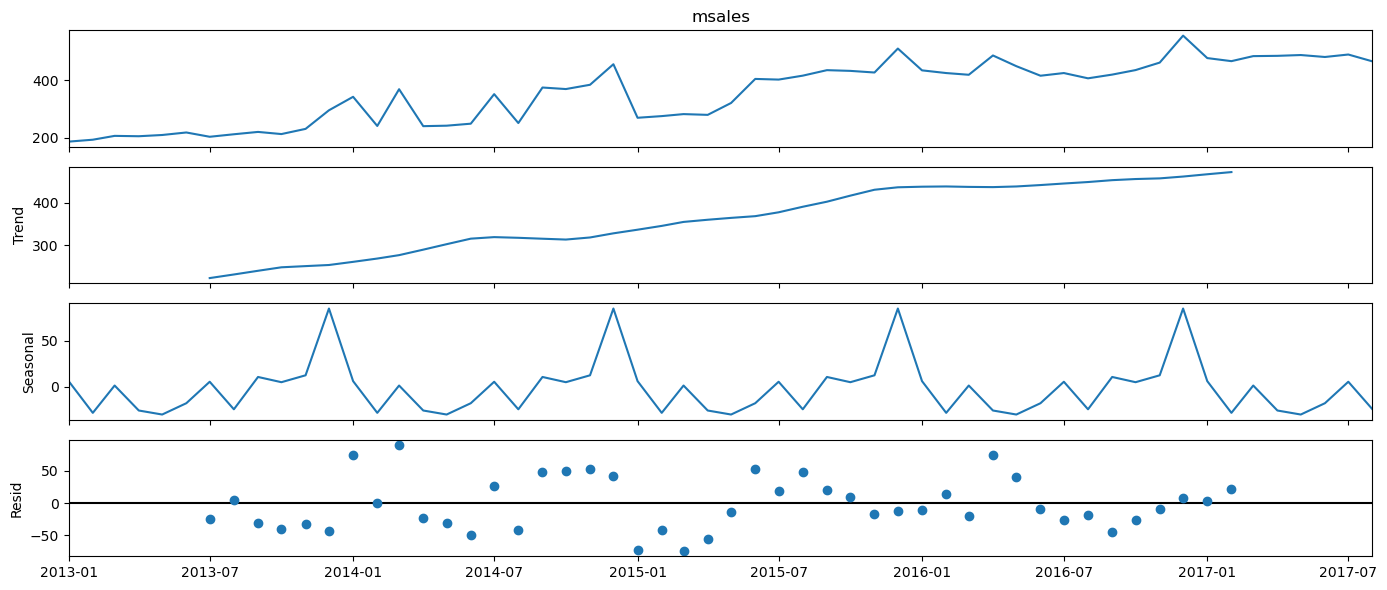

In [19]:
t_series = train.groupby(['date'])['sales'].agg(['mean']).reset_index().rename(columns={'mean': 'msales'})
t_series = t_series.set_index('date')
sample = t_series['msales'].resample('MS').mean()
decomposition = sm.tsa.seasonal_decompose(sample, model='additive')
fig = decomposition.plot()
fig.set_size_inches((14, 6))
fig.tight_layout()
plt.show()
plt.close()

### III.  Analyse de la tendance des ventes jounralières et moyennes mobiles par rapport aux prix journaliers de pétrole 

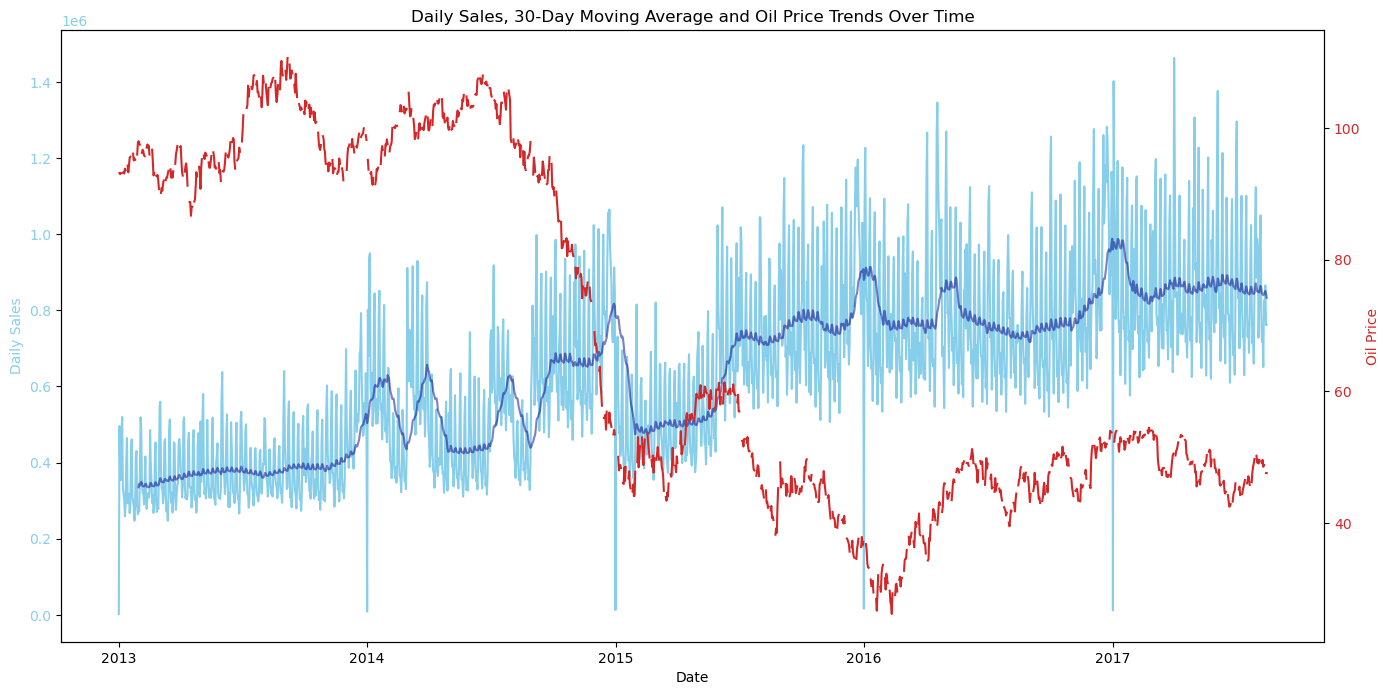

In [38]:
# Moyenne des ventes journalière
daily_sales = train.groupby('date')['sales'].sum().reset_index()

# la moyenne mobile sur 30-jours des ventes jounrnalières moyennes
daily_sales['30_day_ma'] = daily_sales['sales'].rolling(window=30).mean()

# la moyenne mobile sur 30-jours des ventes jounrnalières moyennes
daily_sales = pd.merge(daily_sales, oil, on=['date'], how='left')
daily_oil_prices = daily_sales.groupby('date')['dcoilwtico'].mean().reset_index()

# Plotting
fig, ax1 = plt.subplots(figsize=(14, 7))

color = 'skyblue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Daily Sales', color=color)
ax1.plot(daily_sales['date'], daily_sales['sales'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.plot(daily_sales['date'], daily_sales['30_day_ma'], color='darkblue', alpha=0.5)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('Oil Price', color=color)  
ax2.plot(daily_oil_prices['date'], daily_oil_prices['dcoilwtico'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.title('Daily Sales, 30-Day Moving Average and Oil Price Trends Over Time')
plt.show()